Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading the dataset

In [97]:
data = pd.read_csv('healthcare_dataset.csv')
df = data.head(5)

continuous and categorical variables in dataset

In [25]:
continuous_vars = ['Age', 'Billing Amount']
categorical_vars = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider']

Age vs Gender: Distribution of patients across different age groups, broken down by gender

C:\Users\keyur\AppData\Local\Temp\ipykernel_19360\4070795921.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)


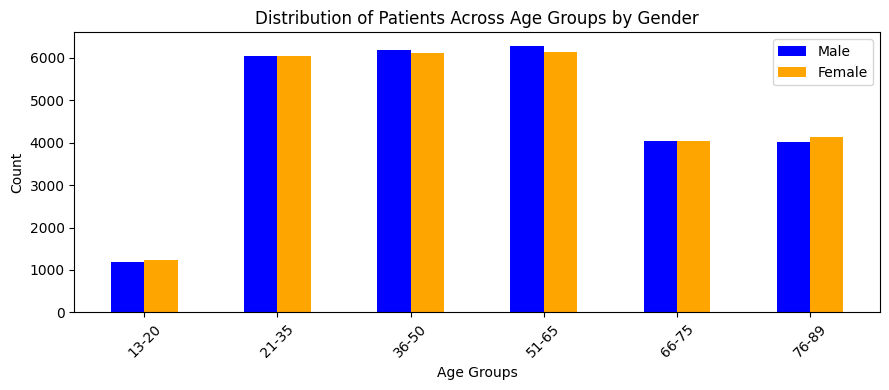

In [47]:
bins = [13, 20, 35,50, 65, 75,89]
labels = ['13-20', '21-35', '36-50', '51-65','66-75','76-89']


data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)
grouped_data = data.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

age_groups = grouped_data.index
male_counts = grouped_data.get('Male', [0] * len(age_groups))
female_counts = grouped_data.get('Female', [0] * len(age_groups))

# Create the bar chart
x = np.arange(len(age_groups))
width = 0.25  

plt.figure(figsize=(9, 4))
plt.bar(x - width / 2, male_counts, width, label="Male", color="blue")
plt.bar(x + width / 2, female_counts, width, label="Female", color="orange")


plt.title("Distribution of Patients Across Age Groups by Gender")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.xticks(x, age_groups, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Age vs Medical Condition: Common medical conditions for specific age groups

C:\Users\keyur\AppData\Local\Temp\ipykernel_19360\1159662608.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Medical Condition', 'Age Group']).size().unstack(fill_value=0)


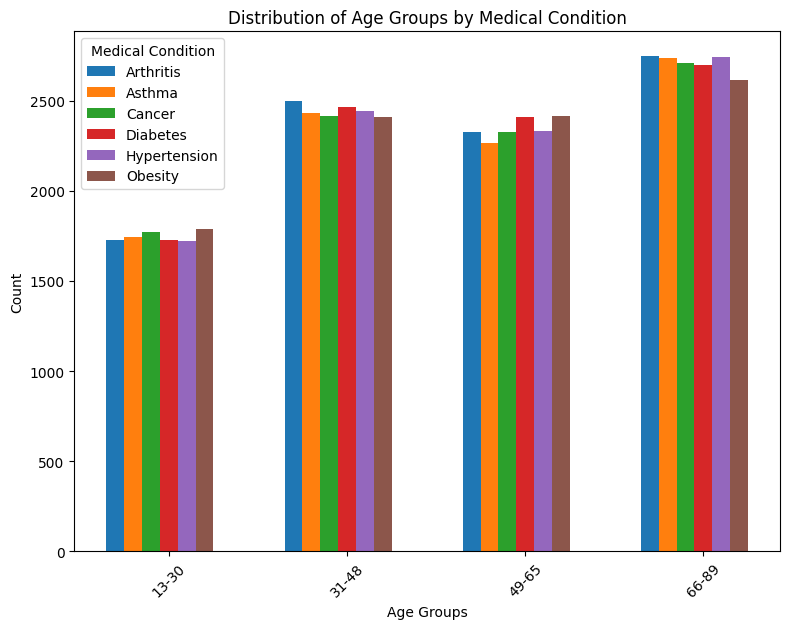

In [ ]:
bins = [13, 30, 48, 65, 89]
labels = ['13-30', '31-48', '49-65', '66-89']

data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

grouped_data = data.groupby(['Medical Condition', 'Age Group']).size().unstack(fill_value=0)
age_groups = labels
conditions = grouped_data.index

x = np.arange(len(age_groups))
width = 0.1
# Create the bar chart
plt.figure(figsize=(8, 6.4))

for i, condition in enumerate(conditions):
    plt.bar(
        x + i * width - (len(conditions) * width / 2),  
        grouped_data.loc[condition],
        width,
        label=condition
    )
plt.title("Distribution of Age Groups by Medical Condition")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.xticks(x, age_groups, rotation=45)
plt.legend(title="Medical Condition")

plt.tight_layout()
plt.show()

Discharge Date vs. Admission Date: Length of stay analysis by medical condition or admission type

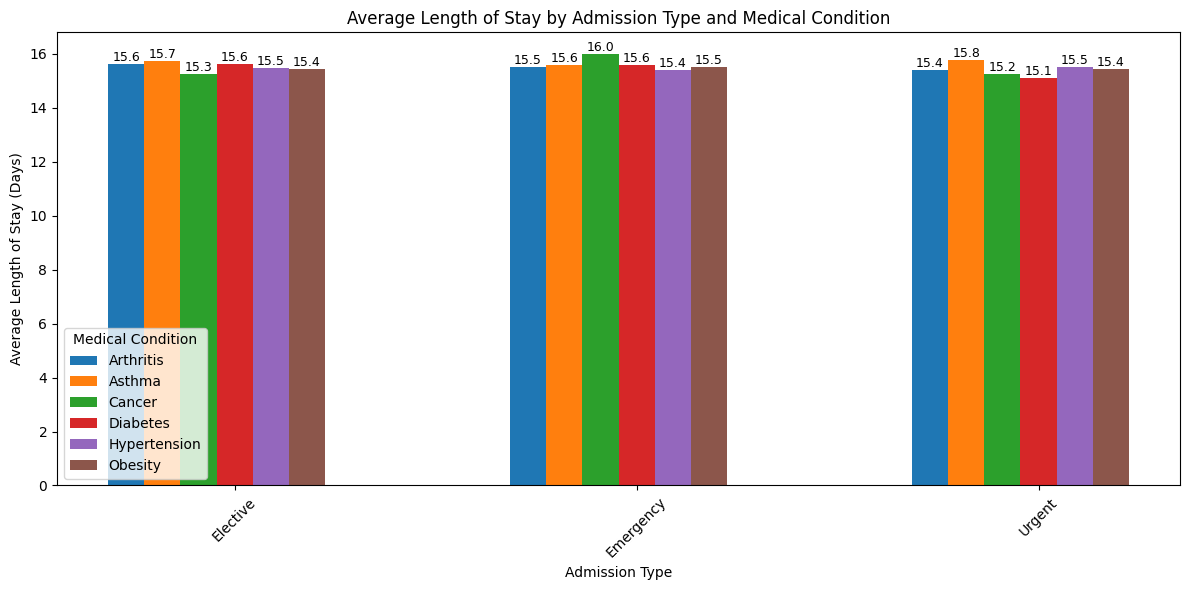

In [88]:
data["Discharge Date"] = pd.to_datetime(data["Discharge Date"])
data["Date of Admission"] = pd.to_datetime(data["Date of Admission"])
data["Length of Stay"] = (data["Discharge Date"] - data["Date of Admission"]).dt.days

grouped_data = data.groupby(['Admission Type', 'Medical Condition'])['Length of Stay'].mean().unstack(fill_value=0)

admission_types = grouped_data.index
conditions = grouped_data.columns
x = np.arange(len(admission_types))  
width = 0.09  

# Create the bar chart
plt.figure(figsize=(12, 6))

for i, condition in enumerate(conditions):
    bars = plt.bar(
        x + i * width - (len(conditions) * width / 2),
        grouped_data[condition],
        width,
        label=condition
    )
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,  
            f"{height:.1f}",
            # palette="crest", 
            ha="center",  
            va="bottom", 
            fontsize=9  
        )

plt.title("Average Length of Stay by Admission Type and Medical Condition")
plt.xlabel("Admission Type")
plt.ylabel("Average Length of Stay (Days)")
plt.xticks(x, admission_types, rotation=45) 
plt.legend(title="Medical Condition")

plt.tight_layout()
plt.show()


Billing Amount vs Medical Condition: Medical conditions that incur higher costs

C:\Users\keyur\AppData\Local\Temp\ipykernel_19360\3654906711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=billing_data, x='Medical Condition', y='Billing Amount', palette="crest")


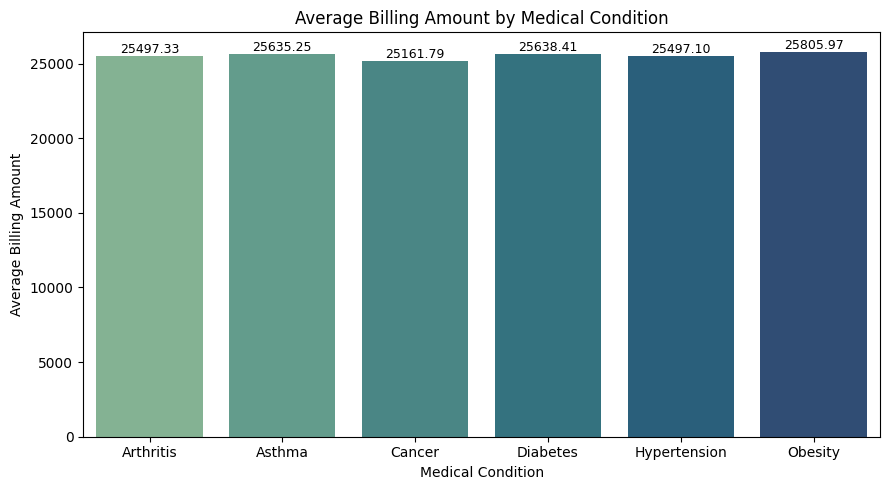

In [81]:
billing_data = data.groupby('Medical Condition')['Billing Amount'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(9, 5))
bars = sns.barplot(data=billing_data, x='Medical Condition', y='Billing Amount', palette="crest")

# Add labels and title
plt.title("Average Billing Amount by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=0)

# Annotate each bar with its corresponding average billing amount
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position at the center of the bar
        height,  # Position just above the bar
        f"{height:.2f}",  # Display the value rounded to two decimal places
        ha="center",  # Horizontal alignment
        va="bottom",  # Vertical alignment
        fontsize=9  # Font size
    )

# Show the plot
plt.tight_layout()
plt.show()

 Medication vs Medical Condition: Common medications prescribed for specific conditions

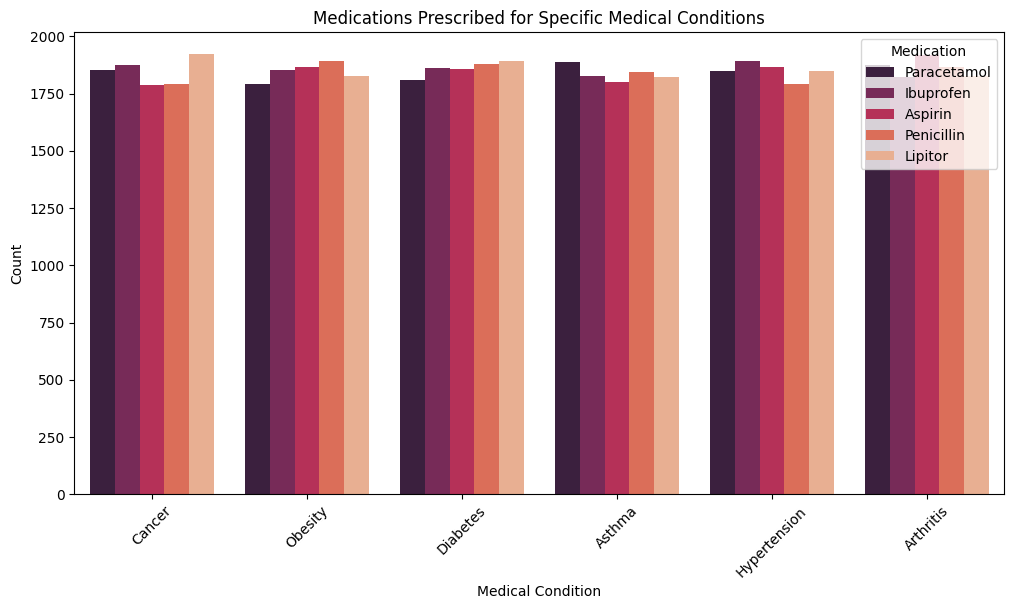

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Medical Condition", hue="Medication", palette="rocket")
plt.title("Medications Prescribed for Specific Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Medication")
plt.show()

Insurance Provider vs Medical Condition: Conditions frequently claimed under specific insurance providers

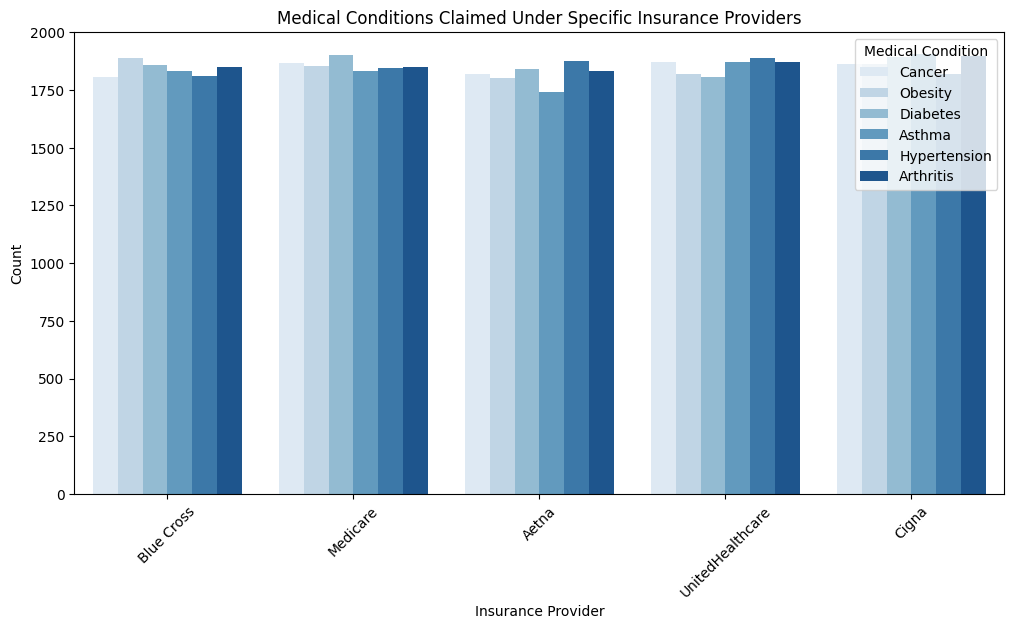

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Insurance Provider", hue="Medical Condition", palette="Blues")
plt.title("Medical Conditions Claimed Under Specific Insurance Providers")
plt.xlabel("Insurance Provider")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Medical Condition")
plt.show()


Discharge Date vs Admission Type: Duration of stay for elective vs. emergency admissions

C:\Users\keyur\AppData\Local\Temp\ipykernel_19360\3257524204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Admission Type", y="Length of Stay", palette="husl")


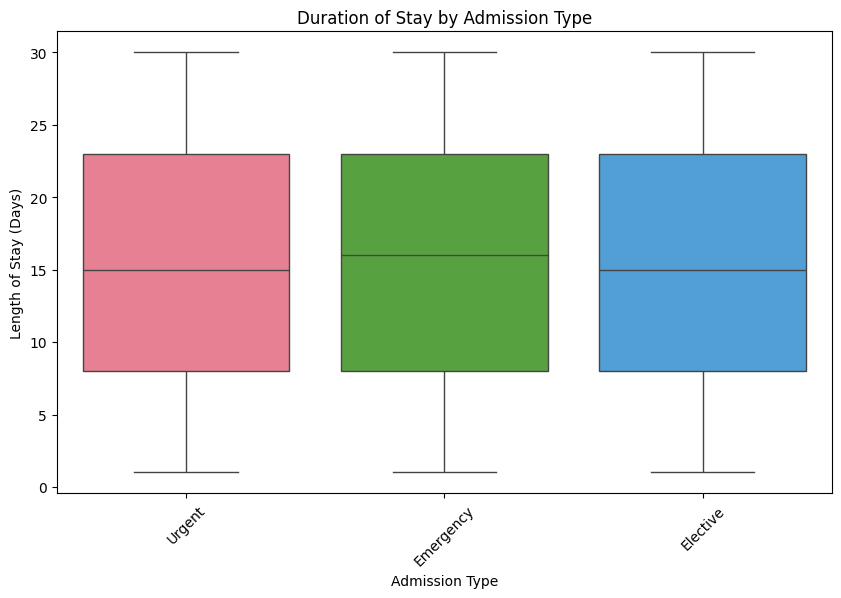

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Admission Type", y="Length of Stay", palette="husl")
plt.title("Duration of Stay by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Length of Stay (Days)")
plt.xticks(rotation=45)
plt.show()
